In [6]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X = lfw_people.data
y = lfw_people.target

target_names = lfw_people.target_names
n_samples, h, w = lfw_people.images.shape
n_classes = target_names.shape[0]

print("Total dataset size:")
print(f"n_samples: {n_samples}")
print(f"n_features: {X.shape[1]}")
print(f"n_classes: {n_classes}")


Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


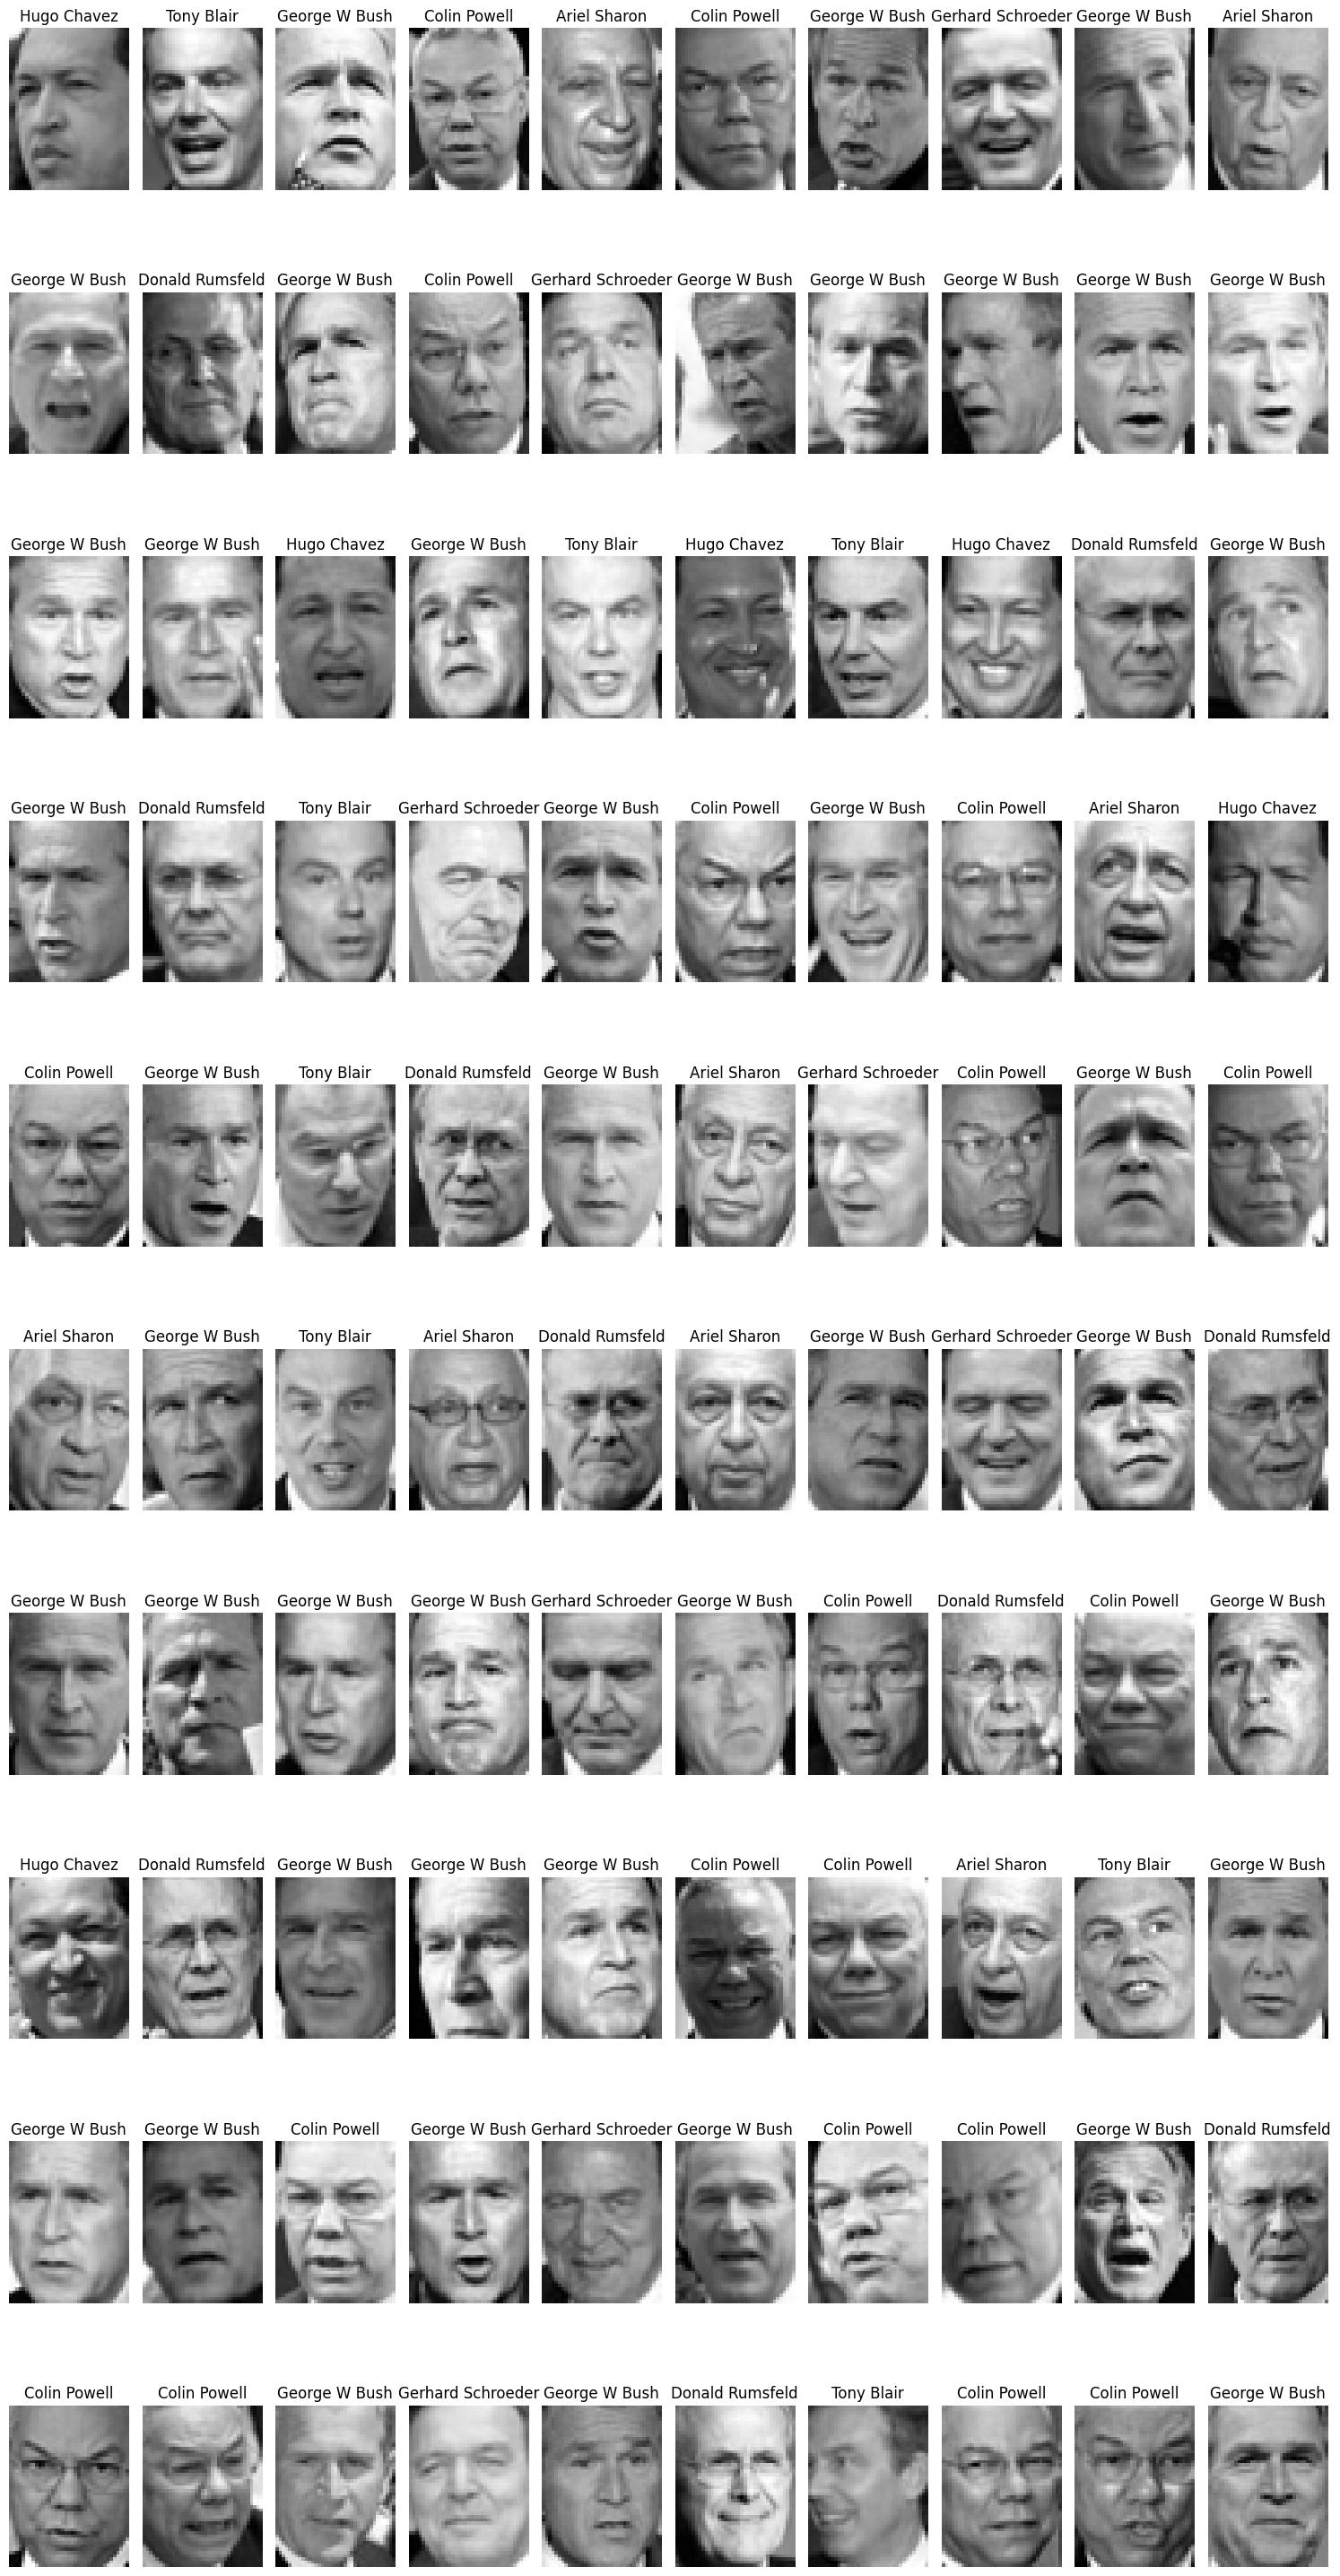

In [9]:
# Select a subset 100 of images
n = 100

# Plot the images with labels
fig, ax = plt.subplots(10, 10, figsize=(15, 30))
ax = ax.flatten()
for i in range(n):
    ax[i].imshow(lfw_people.images[i], cmap='gray')
    ax[i].set_title(target_names[y[i]])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [10]:
for name in target_names:
     print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) #Split the data into training data and testing data

In [12]:
n_components = 100  # Number of components to keep
# choose the best 100 with the highes variance, each is a linear combination by 1850 features

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train) # fit pca

eigenfaces = pca.components_.reshape((n_components, h, w)) #reshape back into image shape with new 100 features

X_train_pca = pca.transform(X_train) # numerical representation
X_test_pca = pca.transform(X_test)

Extracting the top 100 eigenfaces from 966 faces


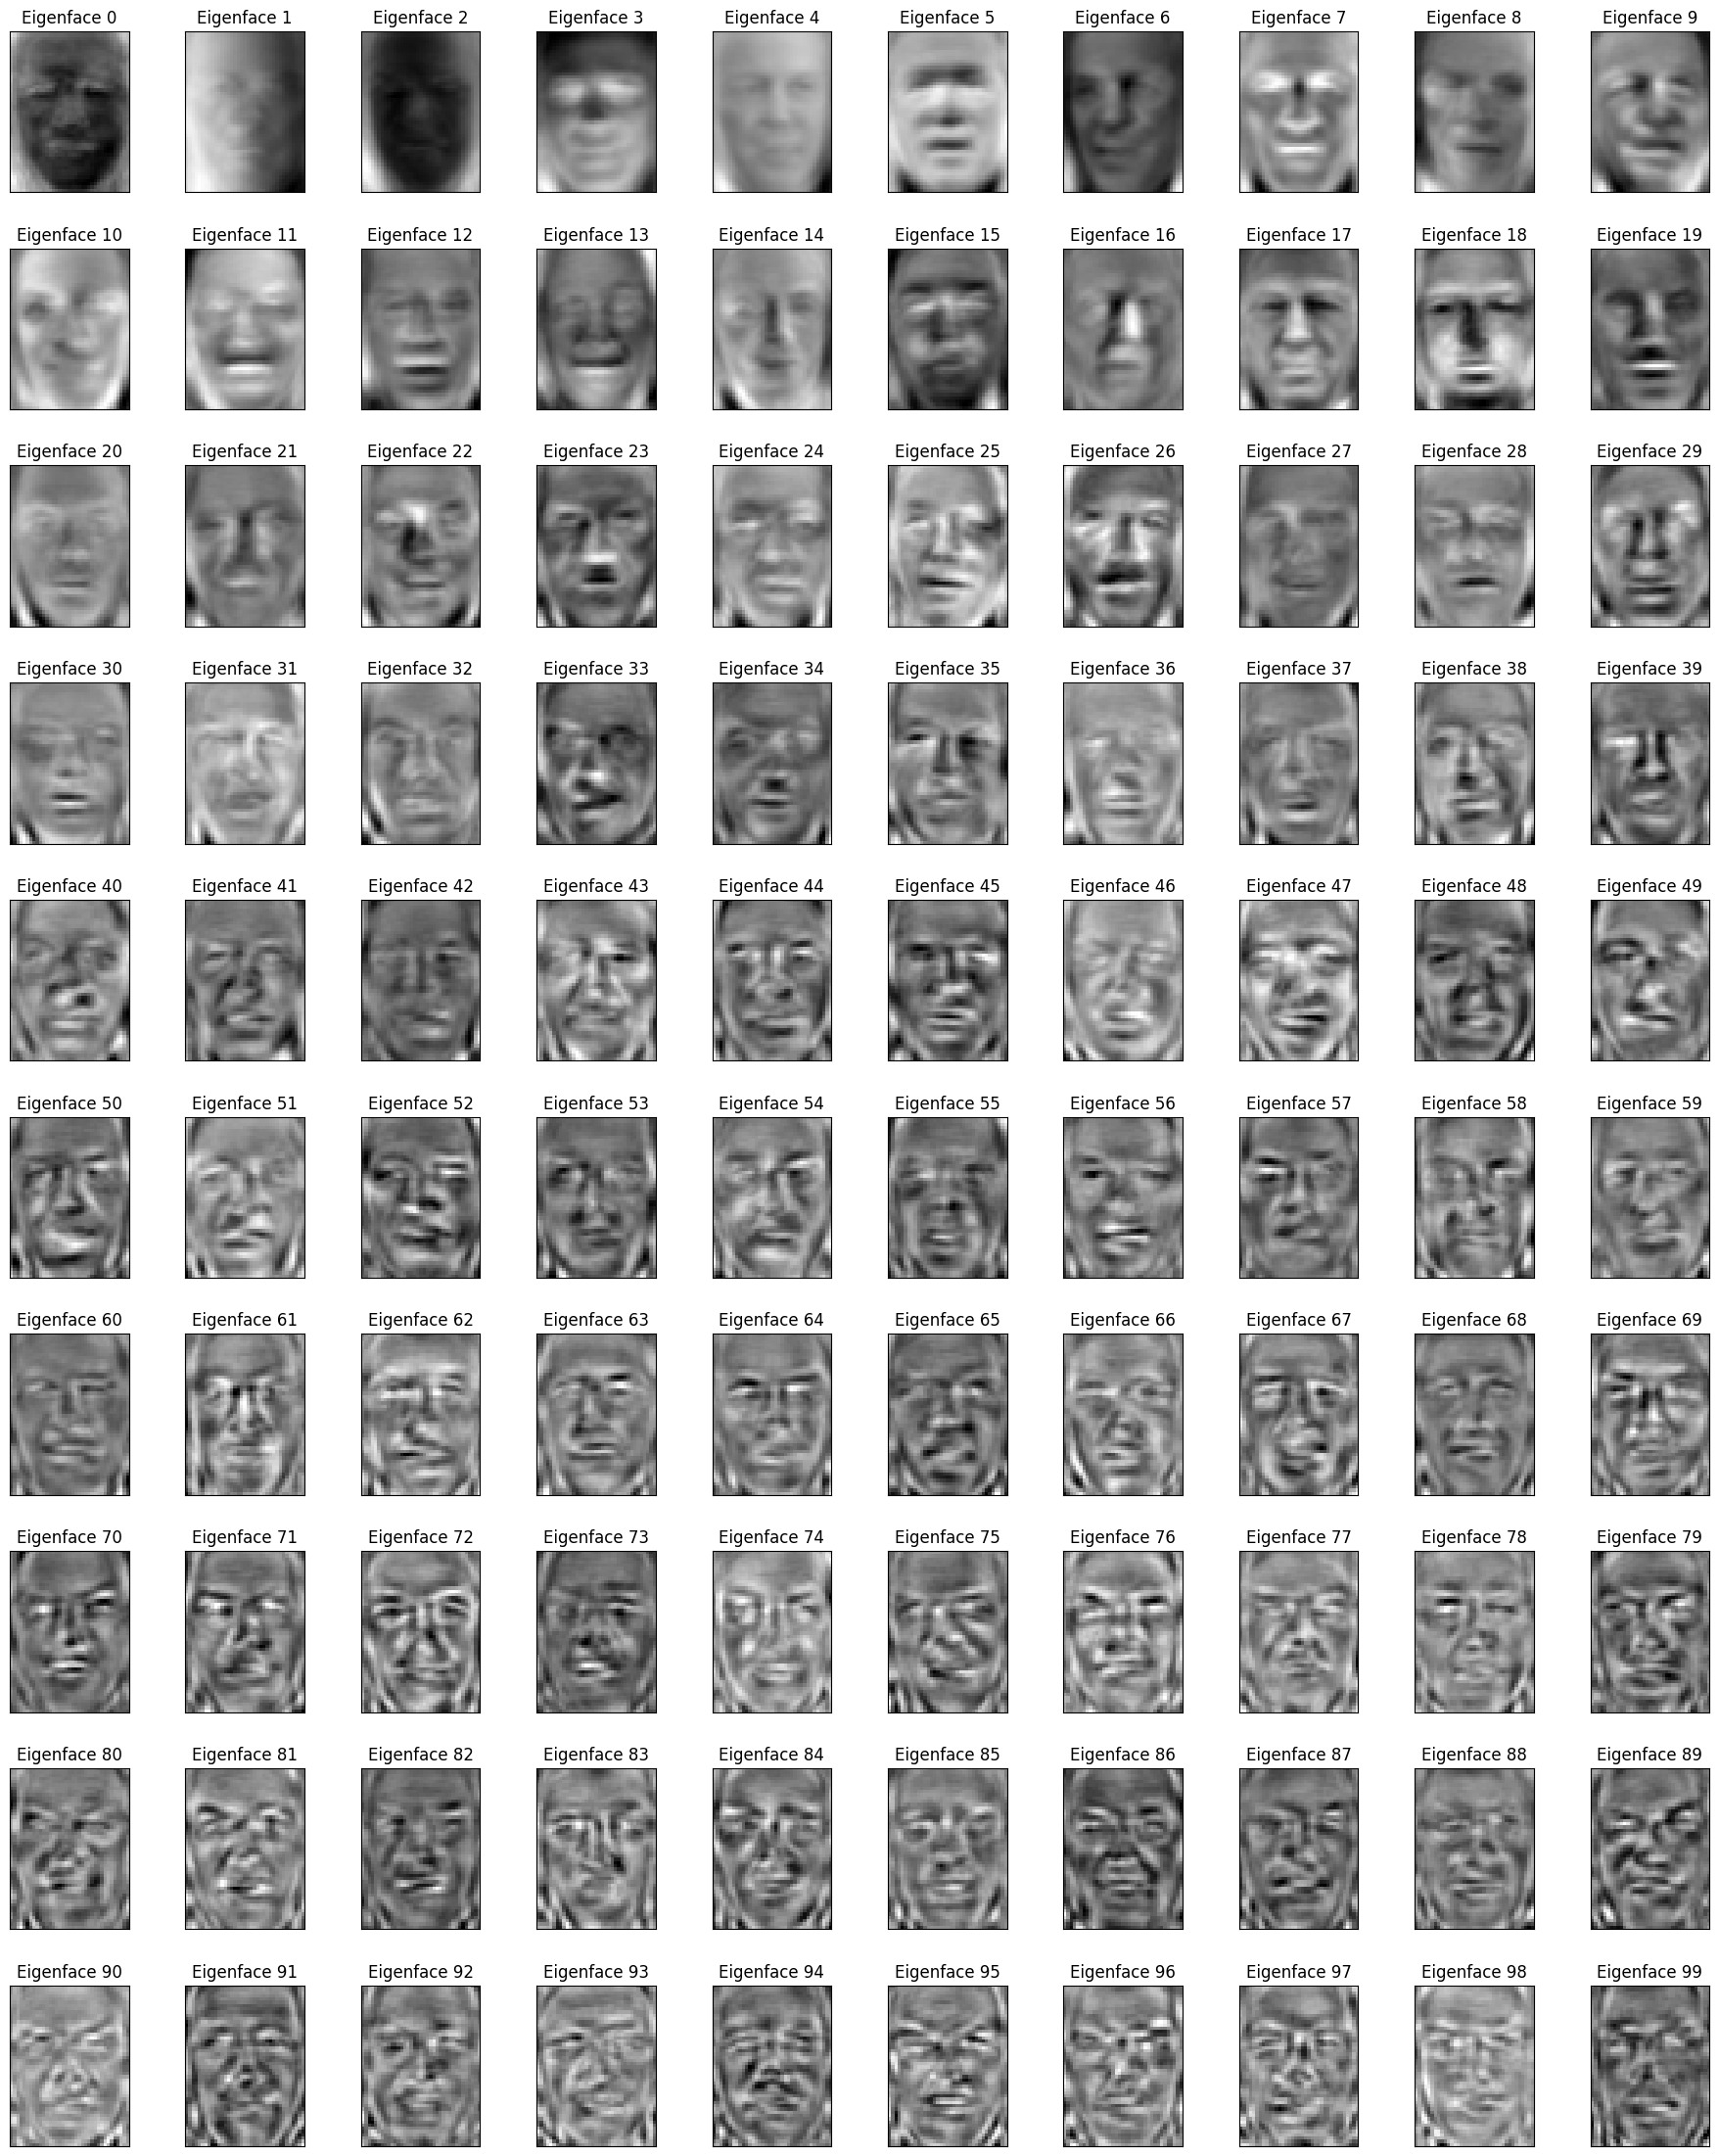

In [14]:
# Plot the 100 eigenfaces

def plot_gallery(images, titles, h, w, n_row=10, n_col=10):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)

    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

eigenface_titles = [f"Eigenface {i}" for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)


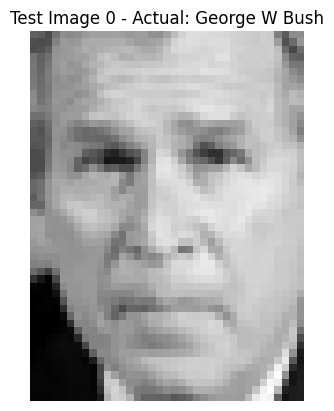

In [15]:
# Plot test_face0 with its label
plt.imshow(X_test[0].reshape((h, w)), cmap='gray')
plt.title(f"Test Image 0 - Actual: {target_names[y_test[0]]}")
plt.axis('off')
plt.show()

In [17]:
# Measure the Euclidean distance from the test_face0 to all training faces
distances = np.linalg.norm(X_train_pca - X_test_pca[0], axis=1)

min_index = np.argmin(distances) # Find the index of the minimum distance

# Find the label of the closest training image
predicted_label = y_train[min_index]
print(f"Actual name: {target_names[y_test[0]]}")
print(f"Predicted name: {target_names[predicted_label]}")

if predicted_label == y_test[0]:
    print(f"It matches!!")
else:
    print(f"No, it doesnt match :(")

Actual name: George W Bush
Predicted name: George W Bush
It matches!!


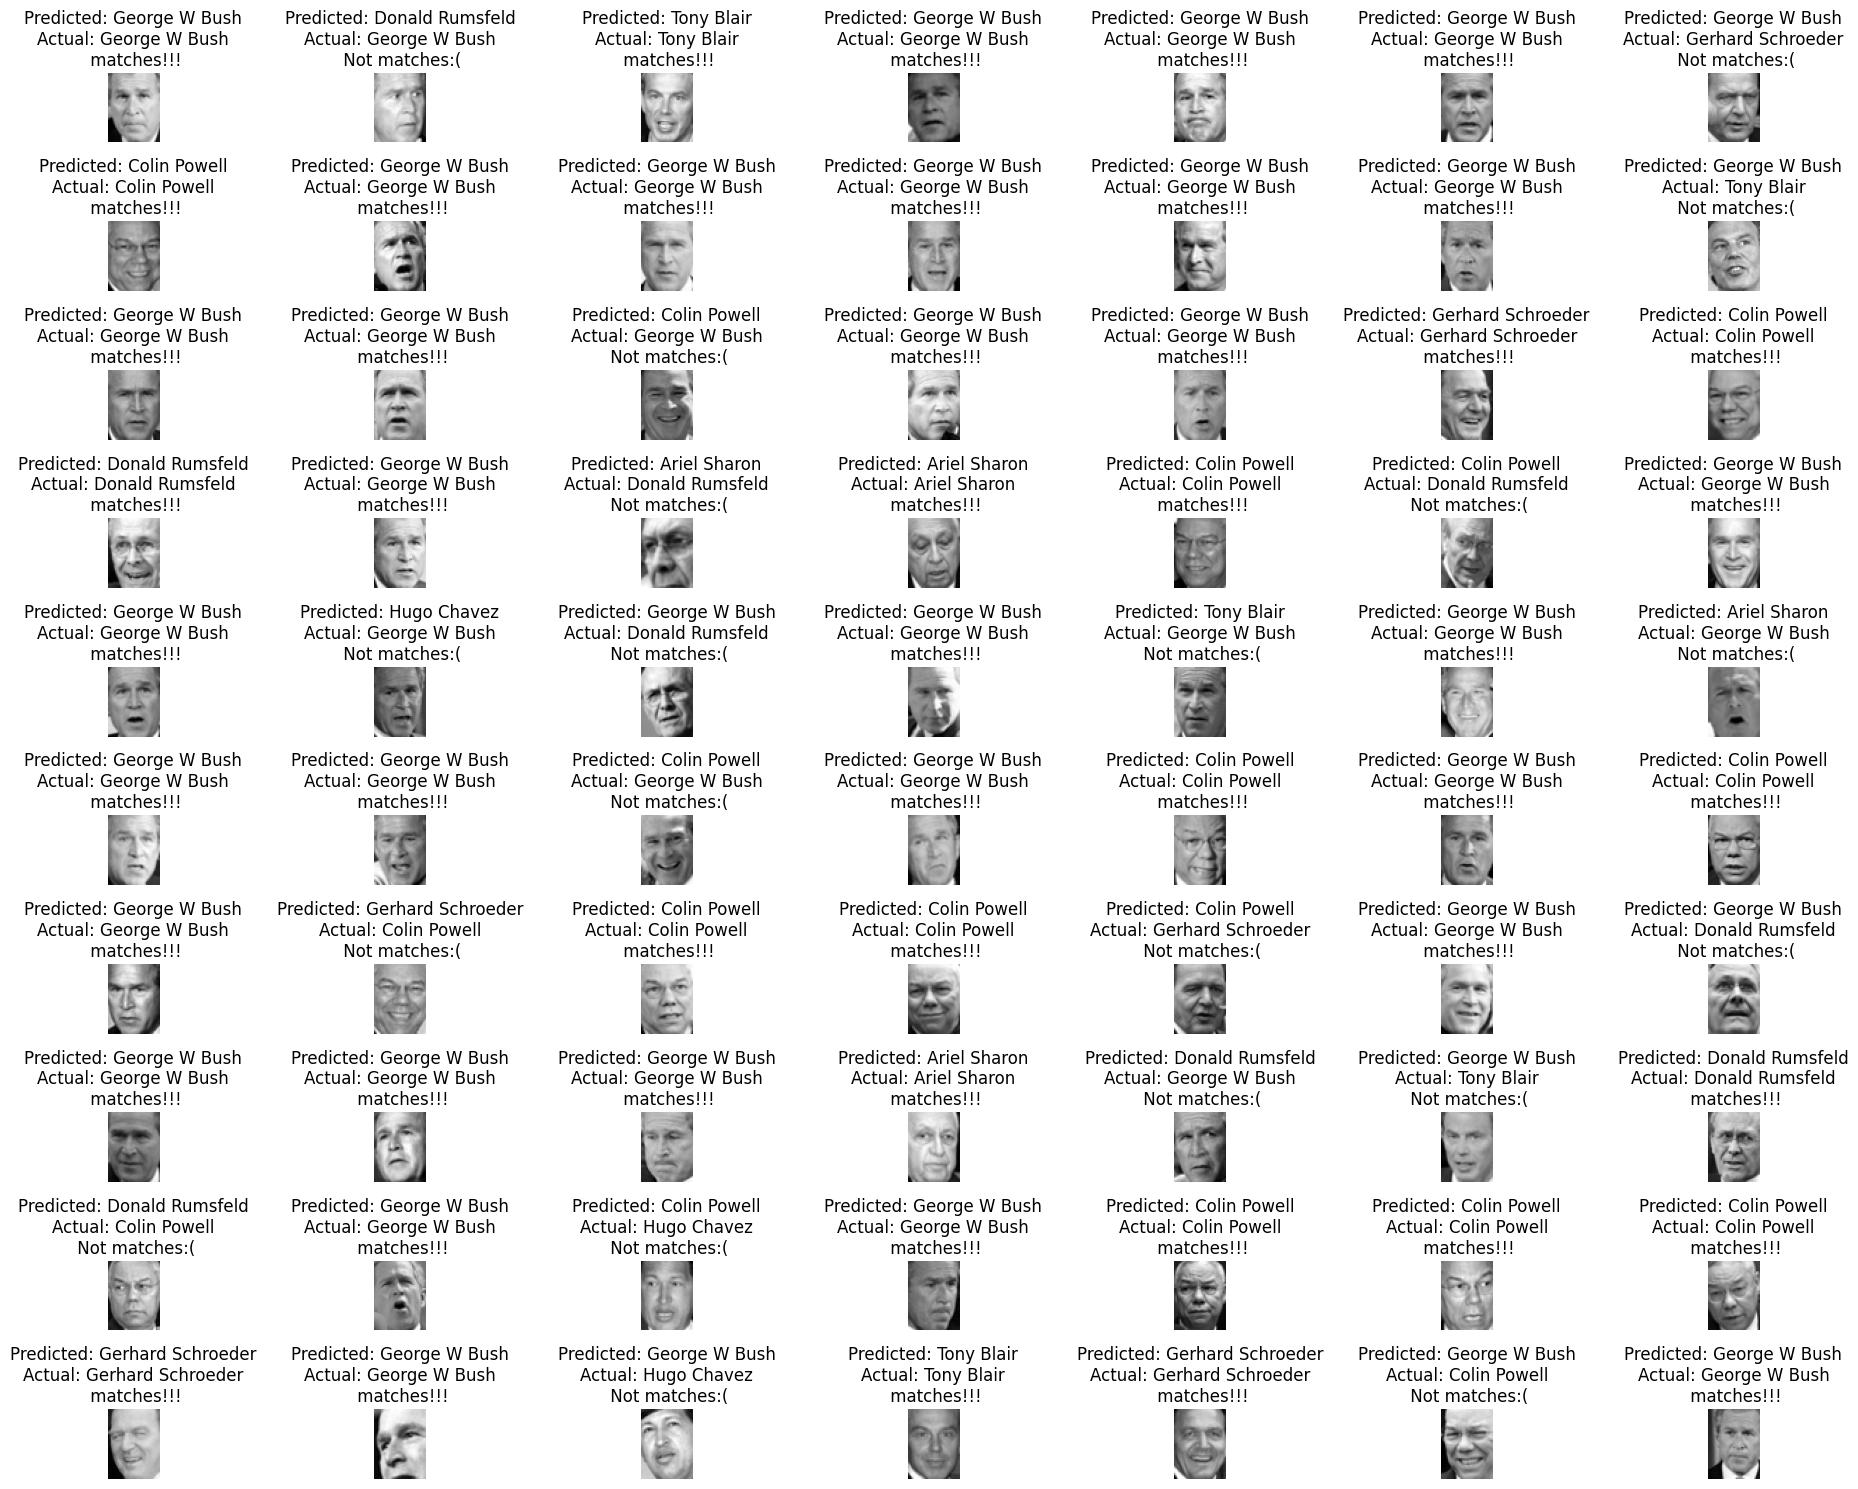

Predict accuracy = 66.46%


In [20]:
#Finding the predict name for all the testing data

# Initialize an empty list to store predicted labels
predicted_labels = []

# Calculate the Euclidean distances
for i in X_test_pca:
    distances = np.linalg.norm(X_train_pca - i , axis=1)
    min_index = np.argmin(distances)
    predicted_label = y_train[min_index]
    predicted_labels.append(predicted_label)

# Plot first 70 of the test image with output names
fig, ax = plt.subplots(10, 7, figsize=(20, 15))
ax = ax.flatten()
for i in range(70):
    ax[i].imshow(X_test[i].reshape((h, w)), cmap='gray')
    if target_names[predicted_labels[i]] == target_names[y_test[i]]:
      title = f"Predicted: {target_names[predicted_labels[i]]}\nActual: {target_names[y_test[i]]}\n matches!!!"
    else:
      title = f"Predicted: {target_names[predicted_labels[i]]}\nActual: {target_names[y_test[i]]}\n Not matches:("
    ax[i].set_title(title)
    ax[i].axis('off')

plt.subplots_adjust(bottom=0.1, top=0.9, hspace=1, wspace=0.4)
plt.tight_layout()
plt.show()

# Calculate the predicting accuracy
count = 0

for i in range(len(X_test)):
    if target_names[predicted_labels[i]] == target_names[y_test[i]]:
      count=count+1

print(f"Predict accuracy = {count/len(X_test)*100:.2f}%")
